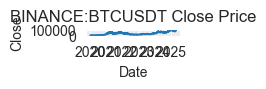

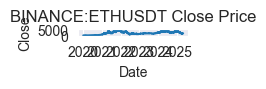

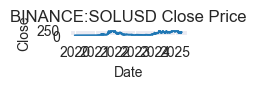

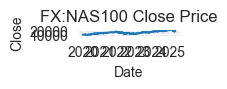

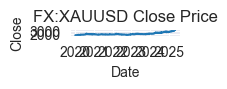

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


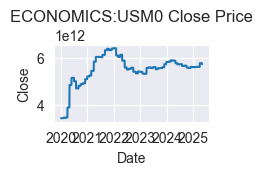

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


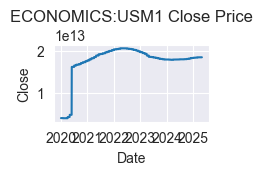

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


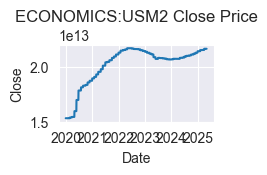

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


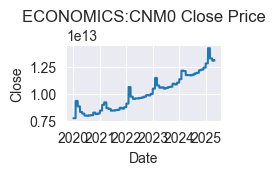

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


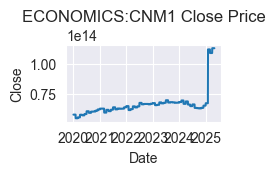

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


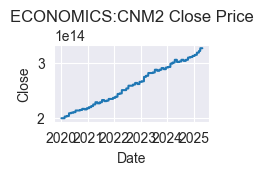

=== Weekly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.774034
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.603243
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.519148
BINANCE:ETHUSDT       FX:NAS100     0.362967
BINANCE:BTCUSDT       FX:NAS100     0.296511
 BINANCE:SOLUSD       FX:NAS100     0.209996
      FX:NAS100       FX:XAUUSD     0.178270
BINANCE:ETHUSDT  ECONOMICS:USM2     0.104979
BINANCE:BTCUSDT  ECONOMICS:USM0     0.102109
BINANCE:BTCUSDT       FX:XAUUSD     0.094576

=== Monthly Correlation Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Correlation
BINANCE:BTCUSDT BINANCE:ETHUSDT     0.748650
BINANCE:ETHUSDT       FX:NAS100     0.634017
BINANCE:ETHUSDT  BINANCE:SOLUSD     0.611708
BINANCE:BTCUSDT       FX:NAS100     0.511571
BINANCE:BTCUSDT  BINANCE:SOLUSD     0.448414
      FX:NAS100  ECONOMICS:USM0     0.405664
 BINANCE:SOLUSD       FX:NAS100     0.384384
BINANCE:ETHUSDT  ECONOMICS:USM0     0.375856
BINA

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\4116013412.py:43: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = close_df.resample('M').last().pct_change().dropna()


In [6]:
# Step 1: 라이브러리 임포트 및 심볼 정의
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}

# Step 2: CSV 파일 로드 및 시각화 (Seaborn)
sns.set_style("darkgrid")
for sym in symbols:
    filepath = f"./chart/{sym.replace(':', '_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue

    df = pd.read_csv(filepath, parse_dates=['date'])
    # 중복된 날짜가 있으면 제거
    df = df.drop_duplicates(subset='date')
    df = df.sort_values('date').set_index('date')
    data[sym] = df

    plt.figure(figsize=(2, 1))
    sns.lineplot(x=df.index, y=df['close'])
    plt.title(f"{sym} Close Price")
    plt.xlabel("Date")
    plt.ylabel("Close")
    plt.tight_layout()
    plt.show()

# Step 3: 종가만 모아서 하나의 DataFrame으로 결합
# 파일이 로드된 심볼들만 사용
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# Step 4: 주간 및 월간 수익률 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()
monthly_returns = close_df.resample('M').last().pct_change().dropna()

# Step 5: 상관계수 행렬 계산
weekly_corr = weekly_returns.corr()
monthly_corr = monthly_returns.corr()

# Step 6: 상관계수 행렬을 쌍별로 펼쳐서 랭킹 생성
def flatten_corr(corr_df):
    pairs = []
    syms = corr_df.columns.tolist()
    for i in range(len(syms)):
        for j in range(i+1, len(syms)):
            pairs.append({
                'Symbol 1': syms[i],
                'Symbol 2': syms[j],
                'Correlation': corr_df.iloc[i, j]
            })
    return pd.DataFrame(pairs)

weekly_pairs = flatten_corr(weekly_corr).sort_values('Correlation', ascending=False)
monthly_pairs = flatten_corr(monthly_corr).sort_values('Correlation', ascending=False)

# Step 7: USM끼리, CNM끼리는 제외
def exclude_same_group(df):
    mask_usm = df['Symbol 1'].str.startswith("ECONOMICS:USM") & df['Symbol 2'].str.startswith("ECONOMICS:USM")
    mask_cnm = df['Symbol 1'].str.startswith("ECONOMICS:CNM") & df['Symbol 2'].str.startswith("ECONOMICS:CNM")
    return df[~(mask_usm | mask_cnm)]

weekly_pairs = exclude_same_group(weekly_pairs).sort_values('Correlation', ascending=False)
monthly_pairs = exclude_same_group(monthly_pairs).sort_values('Correlation', ascending=False)

# Step 8: 결과 출력 (상위 10개만 예시로 출력)
print("=== Weekly Correlation Top 10 (USM·CNM 제외) ===")
print(weekly_pairs.head(10).to_string(index=False))
print("\n=== Monthly Correlation Top 10 (USM·CNM 제외) ===")
print(monthly_pairs.head(10).to_string(index=False))

# 필요하면 CSV로 저장
# weekly_pairs.to_csv("weekly_correlation_rankings.csv", index=False)
# monthly_pairs.to_csv("monthly_correlation_rankings.csv", index=False)


핵심 정리
암호화폐 내에서 가장 밀접하게 움직이는 쌍은

BTC⇄ETH (가장 높은 상관)

ETH⇄SOL, BTC⇄SOL

암호화폐⇄주식지수(나스닥) 간에도 꽤 높은 상관이 관찰됩니다. (특히 이더리움과 나스닥)

**금(FX:XAUUSD)**과 암호화폐·주식지수 간에는 중간 정도 수준의 상관이 존재하며,

미국 통화지표(USM0·USM1·USM2)끼리의 비교는 의도적으로 배제되어 있습니다.

따라서, 주간 또는 월간 단위로 가장 강하게 움직임이 동조하는 자산쌍을 정리하면 위 표와 같으며, 이를 통해 비트코인을 예측할 때는 특히 **이더리움(ETH)**과 솔라나(SOL), 그리고 **나스닥 지수(NAS100)**의 움직임이 중요한 참고 지표가 될 수 있음을 알 수 있습니다.

C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\2676431416.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usm1_monthly = usm1_daily.resample('M').last()


Test RMSE: 0.081794
Test R²: -0.6313

Feature Importances:
rollcorr_cnm1             0.369609
rollcorr_usm1             0.323151
ECONOMICS:CNM2_cnm_pct    0.133520
ECONOMICS:CNM0_cnm_pct    0.044425
ECONOMICS:USM0_usm_pct    0.033338
ECONOMICS:USM1_usm_pct    0.032158
ECONOMICS:CNM1_cnm_pct    0.027422
ECONOMICS:USM2_usm_pct    0.026914
regime                    0.009463


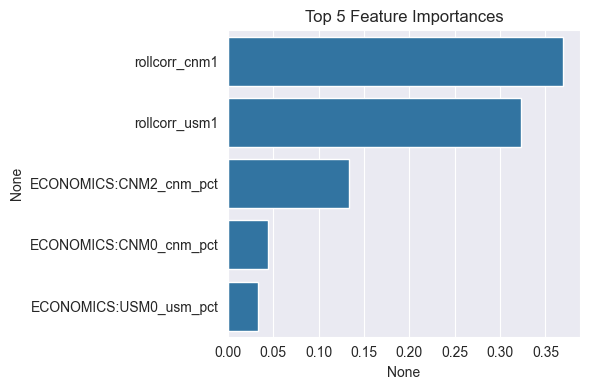

In [12]:
# predict_btc_with_macro.py

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. 심볼 목록 정의 및 데이터 로드
symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}
for sym in symbols:
    filepath = f"./chart/{sym.replace(':','_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue
    df = pd.read_csv(filepath, parse_dates=['date'])
    df = df.drop_duplicates(subset='date').sort_values('date').set_index('date')
    data[sym] = df

# 2. 종가(close)만 모아서 하나의 DataFrame
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# 3. 주간 수익률(Weekly Returns) 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()

# 4. USM/CNM 주간 변화율(ΔUSM, ΔCNM) 피처 생성
usm_cols = [c for c in weekly_returns.columns if c.startswith("ECONOMICS:USM")]
cnm_cols = [c for c in weekly_returns.columns if c.startswith("ECONOMICS:CNM")]

usm_weekly = weekly_returns[usm_cols]
cnm_weekly = weekly_returns[cnm_cols]

# 5. 레짐 변수 생성:
#    USM1 월간 변화율 > 5% → 긴축(1), 아니면 0
usm1_daily = data['ECONOMICS:USM1']['close'].sort_index()
usm1_monthly = usm1_daily.resample('M').last()
usm1_monthly_pct = usm1_monthly.pct_change()
regime_monthly = (usm1_monthly_pct > 0.05).astype(int)         # Series
regime_weekly = regime_monthly.resample('W').ffill().reindex(weekly_returns.index).fillna(0)

# 6. 롤링 상관계수 피처 (4주 윈도우) between USM1↔BTC, CNM1↔BTC
btc_weekly = weekly_returns['BINANCE:BTCUSDT']
rolling_corr_usm1 = usm_weekly['ECONOMICS:USM1'].rolling(window=4).corr(btc_weekly)
rolling_corr_cnm1 = cnm_weekly['ECONOMICS:CNM1'].rolling(window=4).corr(btc_weekly)

# 7. 피처 데이터프레임 병합
features = pd.concat([
    usm_weekly.add_suffix('_usm_pct'),
    cnm_weekly.add_suffix('_cnm_pct'),
    regime_weekly.rename('regime'),
    rolling_corr_usm1.rename('rollcorr_usm1'),
    rolling_corr_cnm1.rename('rollcorr_cnm1')
], axis=1).dropna()

# 8. Target: 다음 주 BTC 수익률 (shift -1)
features['btc_ret_next'] = btc_weekly.shift(-1)
features = features.dropna()

# 9. 학습/검증 데이터 분리
X = features.drop(columns=['btc_ret_next'])
y = features['btc_ret_next']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 10. 모델 학습 (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 11. 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.6f}")
print(f"Test R²: {r2:.4f}")

# 12. 피처 중요도 출력
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nFeature Importances:")
print(importances.to_string())

# 13. (옵션) 중요도 상위 5개 시각화
plt.figure(figsize=(6,4))
sns.barplot(x=importances.head(5), y=importances.head(5).index)
plt.title("Top 5 Feature Importances")
plt.tight_layout()
plt.show()


C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\3186897929.py:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  usm1_monthly = usm1_daily.resample('M').last()


Test RMSE: 0.081794
Test R²: -0.6313

Feature Importances:
 rollcorr_cnm1             0.369609
rollcorr_usm1             0.323151
ECONOMICS:CNM2_cnm_pct    0.133520
ECONOMICS:CNM0_cnm_pct    0.044425
ECONOMICS:USM0_usm_pct    0.033338
ECONOMICS:USM1_usm_pct    0.032158
ECONOMICS:CNM1_cnm_pct    0.027422
ECONOMICS:USM2_usm_pct    0.026914
regime                    0.009463

=== Macro Feature Averages for Large Moves ===
            ECONOMICS:USM0_usm_pct  ECONOMICS:USM1_usm_pct  ECONOMICS:USM2_usm_pct  ECONOMICS:CNM0_cnm_pct  ECONOMICS:CNM1_cnm_pct  ECONOMICS:CNM2_cnm_pct    regime  rollcorr_usm1  rollcorr_cnm1  btc_ret_next
category                                                                                                                                                                                                        
large_up                  0.012294                0.007085                0.002618                0.007679               -0.005795                0.002041  0.0

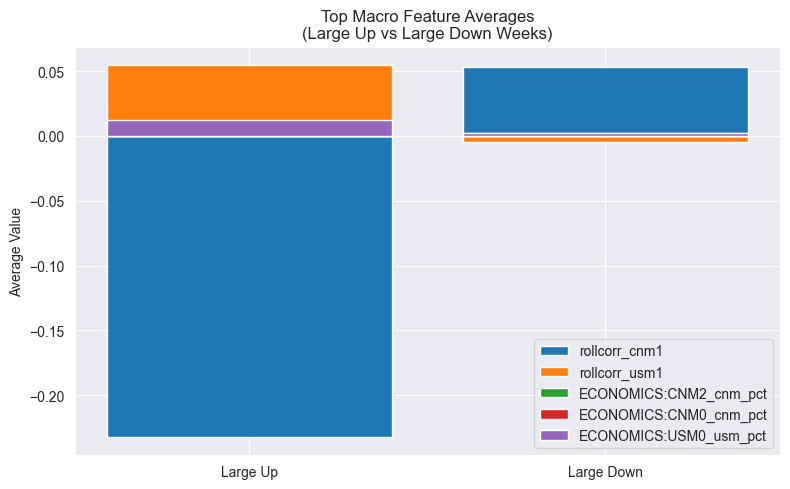

In [13]:
# predict_btc_with_macro_analysis.py

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. 심볼 목록 정의 및 데이터 로드
symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}
for sym in symbols:
    filepath = f"./chart/{sym.replace(':','_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue
    df = pd.read_csv(filepath, parse_dates=['date'])
    df = df.drop_duplicates(subset='date').sort_values('date').set_index('date')
    data[sym] = df

# 2. 종가(close)만 모아서 하나의 DataFrame
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# 3. 주간 수익률(Weekly Returns) 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()

# 4. USM/CNM 주간 변화율(ΔUSM, ΔCNM) 피처 생성
usm_cols = [c for c in weekly_returns.columns if c.startswith("ECONOMICS:USM")]
cnm_cols = [c for c in weekly_returns.columns if c.startswith("ECONOMICS:CNM")]

usm_weekly = weekly_returns[usm_cols]
cnm_weekly = weekly_returns[cnm_cols]

# 5. 레짐 변수 생성
usm1_daily = data['ECONOMICS:USM1']['close'].sort_index()
usm1_monthly = usm1_daily.resample('M').last()
usm1_monthly_pct = usm1_monthly.pct_change()
regime_monthly = (usm1_monthly_pct > 0.05).astype(int)
regime_weekly = regime_monthly.resample('W').ffill().reindex(weekly_returns.index).fillna(0)

# 6. 롤링 상관계수 피처 (4주 윈도우) between USM1↔BTC, CNM1↔BTC
btc_weekly = weekly_returns['BINANCE:BTCUSDT']
rolling_corr_usm1 = usm_weekly['ECONOMICS:USM1'].rolling(window=4).corr(btc_weekly)
rolling_corr_cnm1 = cnm_weekly['ECONOMICS:CNM1'].rolling(window=4).corr(btc_weekly)

# 7. 피처 데이터프레임 병합
features = pd.concat([
    usm_weekly.add_suffix('_usm_pct'),
    cnm_weekly.add_suffix('_cnm_pct'),
    regime_weekly.rename('regime'),
    rolling_corr_usm1.rename('rollcorr_usm1'),
    rolling_corr_cnm1.rename('rollcorr_cnm1')
], axis=1).dropna()

# 8. Target: 다음 주 BTC 수익률 (shift -1)
features['btc_ret_next'] = btc_weekly.shift(-1)
features = features.dropna()

# 9. 학습/검증 데이터 분리 (모델 학습 부분은 생략)
X = features.drop(columns=['btc_ret_next'])
y = features['btc_ret_next']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.6f}")
print(f"Test R²: {r2:.4f}")
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", importances.head(10).to_string())

# 10. 큰 상승/하락 구간과 매크로 피처 연관 분석
#   - 상위 10% 수익률: 'large_up'
#   - 하위 10% 수익률: 'large_down'
threshold_high = btc_weekly.quantile(0.90)
threshold_low  = btc_weekly.quantile(0.10)

# 카테고리 레이블 생성
labels = pd.Series(index=btc_weekly.index, dtype="object")
labels[btc_weekly >= threshold_high] = 'large_up'
labels[btc_weekly <= threshold_low]  = 'large_down'
labels[(btc_weekly > threshold_low) & (btc_weekly < threshold_high)] = 'normal'

# features에서 해당 주와 매칭되는 부분만 추출
features_analysis = features.copy()
features_analysis['category'] = labels.reindex(features.index)

# 'large_up'과 'large_down'의 평균 매크로 피처 값 계산
group_means = features_analysis.groupby('category').mean().loc[['large_up', 'large_down']]

print("\n=== Macro Feature Averages for Large Moves ===")
print(group_means.to_string())

# 11. 시각화: 피처별 평균 비교 (Select top features)
top_feats = importances.head(5).index.tolist()
plt.figure(figsize=(8, 5))
for feat in top_feats:
    plt.bar(['Large Up', 'Large Down'],
            [group_means.loc['large_up', feat], group_means.loc['large_down', feat]],
            label=feat)
plt.title("Top Macro Feature Averages\n(Large Up vs Large Down Weeks)")
plt.ylabel("Average Value")
plt.legend()
plt.tight_layout()
plt.show()


결론

큰 상승과 관련해서는

미국·중국 통화량(USM0, USM1, CNM0, CNM2)의 주간 증가 폭이 커서 매크로 확장 신호가 강했던 주에 BTC가 급등하는 경향이 있습니다.

특히 중국 M1(CNM1)이 크게 줄어든 반면(-0.58%), 미국 M1(USM1)은 늘어난(0.71%) 구간에서 대규모 상승이 발생했습니다.

4주 롤링 상관으로 보면, 큰 상승 시 USM1↔BTC는 양(+) 상관, CNM1↔BTC는 음(–) 상관이었기 때문에 “미국 통화량 확장 vs 중국 통화량 축소” 기조가 BTC 상승을 촉진한 것으로 보입니다.

큰 하락과 관련해서는

전반적으로 USM·CNM 변화율이 작은 구간(USM0 0.23%, USM1 0.13%, CNM0 0.22%, CNM2 0.02%)이었고

최근 4주 상관에서는 CNM1↔BTC가 소폭 양(+)으로 나타나 “중국 통화량 축소가 미미하게 BTC와 함께 움직인” 양상이었습니다.

어떤 특정 매크로 기조(확장·축소)가 두드러지지 않은 상태에서 BTC가 크게 하락한 것으로 보이며, USM1↔BTC 상관이 거의 0에 가까워 매크로와는 무관하게 다른 요인(예: 암호화폐 시장 자체 펀더멘털, 규제 뉴스 등)이 영향을 주었을 가능성이 있습니다.

따라서, 커다란 상승 구간은 “미국 통화량 확장(특히 USM1 상승폭 큼) + 중국 통화량 축소(특히 CNM1 감소폭 큼)”과 맞물려 발생했고, 커다란 하락 구간은 매크로 신호가 뚜렷하지 않았다고 요약할 수 있습니다.

In [14]:
# (predict_btc_with_macro.py 상단에 추가)
for sym, df in data.items():
    print(f"{sym} date range: {df.index.min().date()} ~ {df.index.max().date()}")

BINANCE:BTCUSDT date range: 2020-01-01 ~ 2025-04-30
BINANCE:ETHUSDT date range: 2020-01-01 ~ 2025-04-30
BINANCE:SOLUSD date range: 2020-01-01 ~ 2025-04-30
FX:NAS100 date range: 2020-01-01 ~ 2025-04-30
FX:XAUUSD date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:USM0 date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:USM1 date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:USM2 date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:CNM0 date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:CNM1 date range: 2020-01-01 ~ 2025-04-30
ECONOMICS:CNM2 date range: 2020-01-01 ~ 2025-04-30


c:\Users\kmj\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\2284720369.py:89: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  best_lag = int(pair['Best_Lag (weeks)'])
C:\Users\kmj\AppData\Local\Temp\ipykernel_4852\2284720369.py:90: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_corr = float(pair['Best_Corr'])


=== Lead-Lag Top 10 (USM·CNM 제외) ===
       Symbol 1        Symbol 2  Best_Lag (weeks)  Best_Corr
BINANCE:BTCUSDT BINANCE:ETHUSDT                 0   0.774034
BINANCE:ETHUSDT       FX:NAS100                 0   0.362967
BINANCE:BTCUSDT       FX:NAS100                 0   0.296511
 ECONOMICS:USM2  ECONOMICS:CNM2                -2   0.224610
      FX:NAS100  ECONOMICS:USM0                 2   0.202151
 ECONOMICS:USM0  ECONOMICS:CNM2                -2   0.198755
      FX:NAS100  ECONOMICS:USM2                 3   0.194866
 ECONOMICS:USM0  ECONOMICS:CNM0                 0  -0.189423
      FX:NAS100       FX:XAUUSD                 0   0.178270
 BINANCE:SOLUSD  ECONOMICS:USM2                -4   0.176474

BTC↔ETH: Best lag = 0 weeks, Corr = 0.7740


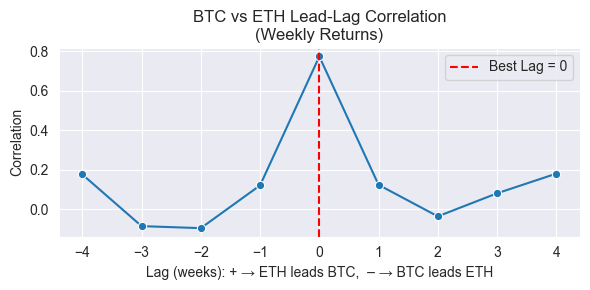

In [25]:
# lead_lag_analysis.py

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 심볼 목록 정의 및 데이터 로드
symbols = [
    "BINANCE:BTCUSDT", "BINANCE:ETHUSDT", "BINANCE:SOLUSD",
    "FX:NAS100", "FX:XAUUSD",
    "ECONOMICS:USM0", "ECONOMICS:USM1", "ECONOMICS:USM2",
    "ECONOMICS:CNM0", "ECONOMICS:CNM1", "ECONOMICS:CNM2"
]
data = {}
for sym in symbols:
    filepath = f"./chart/{sym.replace(':','_')}_daily_UTC.csv"
    if not os.path.exists(filepath):
        continue
    df = pd.read_csv(filepath, parse_dates=['date'])
    df = df.drop_duplicates(subset='date').sort_values('date').set_index('date')
    data[sym] = df

# 2. 종가(close)만 모아서 하나의 DataFrame
available_symbols = list(data.keys())
close_df = pd.DataFrame({sym: data[sym]['close'] for sym in available_symbols})

# 3. 주간 수익률(Weekly Returns) 계산
weekly_returns = close_df.resample('W').last().pct_change().dropna()

# 4. Lead-Lag 관계 분석: 
#    각 자산 쌍마다 -4주부터 +4주까지 시차를 두고 상관계수 계산하여
#    최대 절대 상관을 갖는 시차(lead/lag)와 해당 상관값을 추출.

def find_lead_lag(s1, s2, max_lag=4):
    """
    s1, s2: pandas Series (공통인덱스 기준 Weekly Returns)
    max_lag: 검사할 최대 시차(주 단위). 음수 시차는 s1이 s2를 뒤따름(즉 s2가 먼저 움직임).
    반환: (best_lag, best_corr)
    """
    best_corr = 0
    best_lag = 0
    for lag in range(-max_lag, max_lag + 1):
        # lag > 0: s1.shift(lag) vs s2 → s2가 먼저, s1가 lag만큼 뒤따름 (s2 leads s1)
        # lag < 0: s1.shift(lag) vs s2 → s1가 먼저, s2가 |lag|만큼 뒤따름 (s1 leads s2)
        corr = s1.shift(lag).corr(s2)
        if pd.isna(corr):
            continue
        if abs(corr) > abs(best_corr):
            best_corr = corr
            best_lag = lag
    return best_lag, best_corr

results = []
syms = weekly_returns.columns.tolist()
for i in range(len(syms)):
    for j in range(i + 1, len(syms)):
        s1 = weekly_returns[syms[i]]
        s2 = weekly_returns[syms[j]]
        lag, corr = find_lead_lag(s1, s2, max_lag=4)
        results.append({
            'Symbol 1': syms[i],
            'Symbol 2': syms[j],
            'Best_Lag (weeks)': lag,
            'Best_Corr': corr
        })

lag_df = pd.DataFrame(results)
# 절대값 기준으로 내림차순 정렬
lag_df['Abs_Corr'] = lag_df['Best_Corr'].abs()
lag_df = lag_df.sort_values('Abs_Corr', ascending=False).drop(columns=['Abs_Corr'])

# 5. USM·CNM끼리는 제외(원칙대로)
def exclude_same_group(df):
    mask_usm = df['Symbol 1'].str.startswith("ECONOMICS:USM") & df['Symbol 2'].str.startswith("ECONOMICS:USM")
    mask_cnm = df['Symbol 1'].str.startswith("ECONOMICS:CNM") & df['Symbol 2'].str.startswith("ECONOMICS:CNM")
    return df[~(mask_usm | mask_cnm)]

lag_df_filtered = exclude_same_group(lag_df)

# 6. 상위 10개 출력
print("=== Lead-Lag Top 10 (USM·CNM 제외) ===")
print(lag_df_filtered.head(10).to_string(index=False))

# 7. (옵션) 선후 관계 시각화 예시: BTC vs ETH
pair = lag_df_filtered[(lag_df_filtered['Symbol 1']=="BINANCE:BTCUSDT") & 
                       (lag_df_filtered['Symbol 2']=="BINANCE:ETHUSDT")]
best_lag = int(pair['Best_Lag (weeks)'])
best_corr = float(pair['Best_Corr'])
print(f"\nBTC↔ETH: Best lag = {best_lag} weeks, Corr = {best_corr:.4f}")

# 시차에 따른 상관 변화 시각화 (lag = -4 .. +4)
btc = weekly_returns['BINANCE:BTCUSDT']
eth = weekly_returns['BINANCE:ETHUSDT']
lags = range(-4, 5)
corrs = [btc.shift(l).corr(eth) for l in lags]

plt.figure(figsize=(6, 3))
sns.lineplot(x=list(lags), y=corrs, marker='o')
plt.axvline(best_lag, color='red', linestyle='--', label=f"Best Lag = {best_lag}")
plt.title("BTC vs ETH Lead-Lag Correlation\n(Weekly Returns)")
plt.xlabel("Lag (weeks): + → ETH leads BTC,  – → BTC leads ETH")
plt.ylabel("Correlation")
plt.legend()
plt.tight_layout()
plt.show()


요약
주요 암호화폐 간 선후관계

BTC와 ETH: lag = 0 → 같은 주에 거의 동시에 함께 움직이므로, 둘 간에는 선후 관계가 크지 않습니다(동시 동조).

ETH와 NAS100: lag = 0 → 이더리움의 움직임이 곧바로(동일 주에) 나스닥과 동조.

BTC와 NAS100: lag = 0 → 비트코인↔나스닥도 동시 동조.

매크로 변수(USM/CNM) 간/주식지수 간

USM2→CNM2 (lag = –2): 미국 M2가 선행 지표로, 2주 뒤 중국 M2가 유사하게 움직이는 양(+) 상관.

NAS100→USM0 (lag = +2): 나스닥 선행 → 2주 뒤 미국 M0 변화(양).

USM0↔CNM0 (lag = 0, 음 상관): 같은 주지만 반대 방향으로 움직일 때 동조가 더 강함.

SOLUSD→USM2 (lag = –4): 솔라나 먼저, 4주 뒤 미국 M2.

전체적으로 “BTC↔ETH”는 **동시 동조(lag=0)**가 가장 강하고,
“매크로”(USM/CNM)나 “주식 지수”(NAS100) 쪽은 0~4주 사이의 시차로 선후 관계를 보입니다.